In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics
from sklearn import ensemble

In [2]:
input_data = np.loadtxt('/Users/lucymore/Desktop/Grasp_CSV_data.csv', delimiter=',')
Y = input_data[:,1]
X = input_data[:, 2:]


#print(Y)
print(X.shape[0])

82


In [3]:
num_test = 25

try:
    indicies_test_data = np.load('test_indicies.npy')
except:
    indicies_test_data = np.random.choice(X.shape[0], num_test, replace=False)
    np.save('test_indicies', indicies_test_data)

#indicies_test_data = np.random.choice(X.shape[0], num_test, replace=False)
print(indicies_test_data)

[27 51 16 26 52 76 66 39 56 61 45 23 25 46 59 65 58 11  7 10  5 38 42 60
 41]


In [4]:
X_test = X[indicies_test_data]
Y_test = Y[indicies_test_data]
X_train = np.delete(X, indicies_test_data, axis=0)
Y_train = np.delete(Y, indicies_test_data, axis=0)

#print(X_test)
#print(X_train)

In [5]:
#clf = svm.SVC(kernel='rbf')
clf = ensemble.RandomForestClassifier(100)
clf2 = svm.LinearSVC(max_iter=1000)
clf3 = tree.DecisionTreeClassifier()

clf.fit(X_train[:,:2],Y_train)
clf2.fit(X_train[:,:2], Y_train)
clf3.fit(X_train[:,:2], Y_train)

DecisionTreeClassifier()

In [6]:
predictions = clf.predict(X_test[:,:2])
#scores = clf.score(X_test)
print(predictions)
#print(scores)
correct = np.equal(predictions, Y_test)
accuracy = np.sum(correct) / len(correct)
print(accuracy)

[1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0.]
0.68


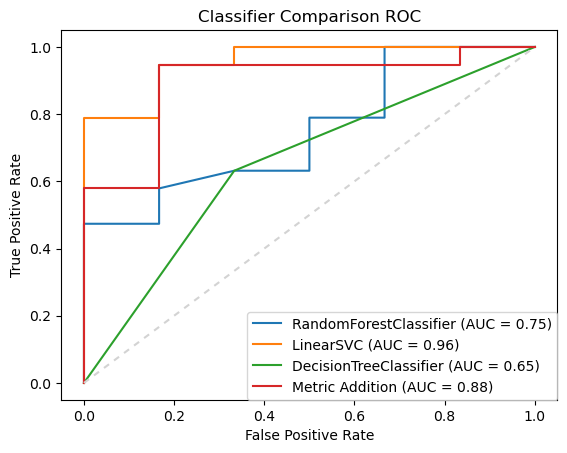

In [18]:
scores = X_test[:,0] + X_test[:,1]
fpr, tpr, thresholds = sk.metrics.roc_curve(Y_test, scores)

classifiers = [clf, clf2, clf3]
ax = plt.gca()

for i in classifiers:
    plot_roc_curve(i, X_test[:,:2], Y_test, ax=ax)
plt.plot(fpr, tpr, label = 'Metric Addition (AUC = 0.88)')

plt.title('Classifier Comparison ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.legend('Random Forest Classifier (AUC = 0.75)', 'Linear SVC (AUC = 0.96)', 'Decision Tree Classifier (AUC = 0.65)', 'Metric Addition (AUC = 0.84)')
plt.legend(loc='best', borderaxespad=0.)
plt.viridis()

plt.plot([0,1], [0,1], color = 'lightgrey', dashes=[3,3])
plt.show()

Threshold = 1.4276


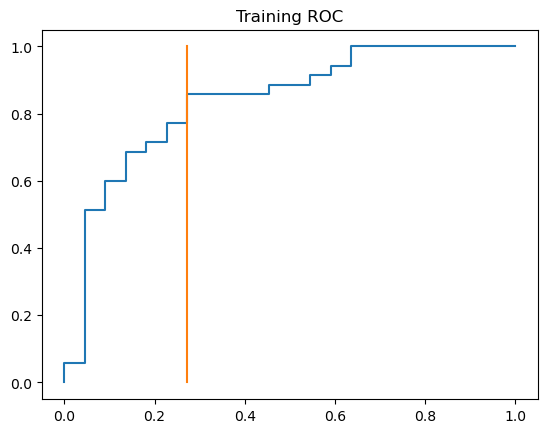

In [8]:
scores = X_train[:,0] + X_train[:,1]
fpr, tpr, thresholds = sk.metrics.roc_curve(Y_train, scores)
plt.plot(fpr, tpr)
plt.title('Training ROC')


G_mean = np.sqrt((1-fpr)*tpr)
best_idx = np.argmax(G_mean)
thresh = thresholds[best_idx]
print('Threshold = ' + str(thresh))
plt.plot([fpr[best_idx],fpr[best_idx]], [0,1])

plt.show()

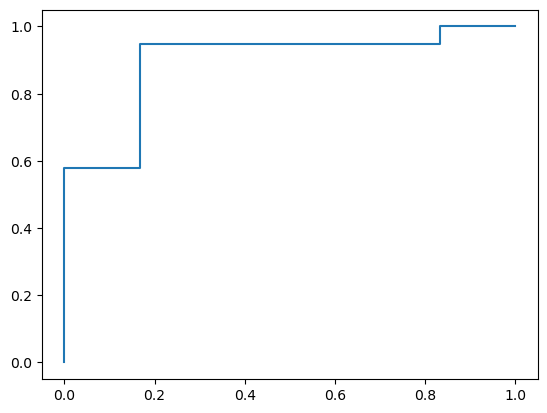

In [9]:
scores = X_test[:,0] + X_test[:,1]
fpr, tpr, thresholds = sk.metrics.roc_curve(Y_test, scores)
plt.plot(fpr, tpr)
plt.show()

[ True False  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True False False
  True]
0.88
[[ 4  2]
 [ 1 18]]


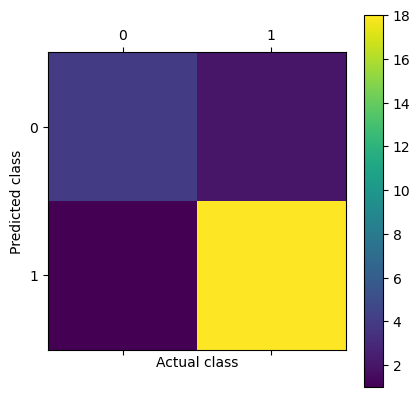

In [10]:
predictions = scores > thresh
print(predictions)
correct = np.equal(predictions, Y_test)
accuracy = np.sum(correct) / len(correct)
print(accuracy)
confus = metrics.confusion_matrix(Y_test, predictions)
print(confus)
cbar = plt.matshow(confus)
plt.colorbar(cbar)
plt.xlabel('Actual class')
plt.ylabel('Predicted class')
plt.show()